The Second Complete lesson on numpy and pyTorch. <br>
Mathematical expressions By sympy<br>

Author: Lawrence M.<br>
Tutor: MxCohen<br>
Rewritten and modifed by Me.2022/27/10<br>


In [1]:
#import the req libraries.
import numpy as np
import torch

In [2]:
#create a vector
vector = np.array([1,40,2,-3])

# finding and reporting the maximum and minimum values
min_val = np.min(vector)
max_val = np.max(vector)

#print them out
print('Min, max: %g, %g'%(min_val, max_val))

Min, max: -3, 40


In [3]:
#Printing out the argmin and argmax.
mini_dx = np.argmin(vector)
maxi_dx = np.argmax(vector)

#print them out.
print('Min, Max indices: %g, %g'%(mini_dx, maxi_dx))

Min, Max indices: 3, 1


In [4]:
def output_print(a,b):
    print('Min, Max: %g, %g'%(a, b))

Can we do them with a matrix?

In [5]:
#create the matrix.
matrix = np.array([[0,1,10],
[20,8,-5]])

#lets display the matrix
print(matrix)

#display the minima and maximas.entire matrix
minimax = np.min(matrix)
maxima = np.max(matrix)
output_print(minimax,maxima)

#across rows.
minimax_row = np.min(matrix,axis = 1)
maxima_row = np.max(matrix, axis=1)
print(minimax_row, maxima_row)
# output_print(minimax_row,maxima_row)

#across columns
minimax_col = np.min(matrix, axis =0)
maxima_col = np.max(matrix, axis=0)
print(minimax_col,maxima_col)

[[ 0  1 10]
 [20  8 -5]]
Min, Max: -5, 20
[ 0 -5] [10 20]
[ 0  1 -5] [20  8 10]


In [6]:
#argmax and argmins

argmin_matrix = np.argmin(matrix)
argmax_matrix = np.argmax(matrix)
print(argmin_matrix, argmax_matrix)


5 3


In [7]:
#using pytorch.

#1. find the maximum and minimum values.
maxval = torch.max(torch.Tensor(matrix))
minval = torch.min(torch.Tensor(matrix))

output_print(minval, maxval)
#2. find the argmax and argmin
argmaxT = torch.argmax(torch.Tensor(matrix))
argminT = torch.argmin(torch.Tensor(matrix))
output_print(argminT, argmaxT)

Min, Max: -5, 20
Min, Max: 5, 3


In [8]:
#lets confim this if its true.
# Torch tensors works very well for a single vector.
# print(f'Max val is {matrix[argmax_matrix]}')


Section Two: Mean Variances and so on...

In [9]:
mean_matrix = np.mean(matrix)
variance_matrix= np.var(matrix, ddof=1)
print(matrix)
output_print(mean_matrix,variance_matrix)


[[ 0  1 10]
 [20  8 -5]]
Min, Max: 5.66667, 79.4667


Samping Variability

In [10]:
import matplotlib.pyplot as plt


Pop Mean 1.625, Sample Mean 1234


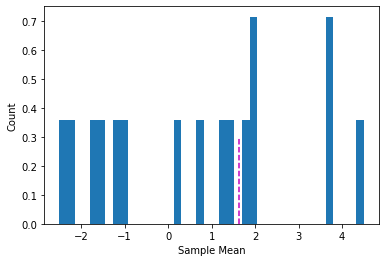

In [13]:
#create a list of numbers to compute the mean and variance.
created_list  = [1,2,4,6,5,4,0,-4,5,-2,6,10,-9,1,3,-6]
number_of_items = len(created_list)

#compute the population mean
pop_mean = np.mean(created_list)



#print them
print('Pop Mean %g, Sample Mean %g'%(pop_mean,1234))
sample_mean_matrix = []
#we can create a histogram to visualize whats hapenin
for i in range(len(created_list)):
    #compute sample mean
    sample = np.random.choice(created_list, size=4, replace=1)
    sample_mean = np.mean(sample)
    sample_mean_matrix.append(sample_mean)

plt.hist(sample_mean_matrix, bins=40, density=True)
plt.plot([pop_mean, pop_mean],[0,0.3],'m--')
plt.xlabel("Sample Mean")
plt.ylabel('Count')
plt.show()

from above there is evidence of non representation.


#### Reproducing randomness via seeding.

In [14]:
#Seeding Using Numpy.

random_seed = np.random.seed(18)
print(np.random.randn(5))
print(np.random.randn(5))

[ 0.07942844  2.19020236 -0.13489215  0.16051798  0.44269784]
[ 0.62339144  1.00890349  0.39424879 -0.3363867  -0.64590646]


In [15]:
#Random Seed with Local Scope
rand_seed_one = np.random.RandomState(17)
rand_seed_two = np.random.RandomState(20210530)

print(rand_seed_one.randn(5))
print(rand_seed_two.randn(5))
print(rand_seed_one.randn(5))
print(rand_seed_two.randn(5))

[ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
[-0.24972681 -1.01951826  2.23461339  0.72764703  1.2921122 ]
[ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]
[ 1.15494929 -0.0015467  -0.11196868 -1.08136725  0.10265891]


Random Numbers Using PyTorch.

In [16]:
#Seeding using Pytorch.
torch.manual_seed(17)
print(torch.randn(5))

tensor([-1.4135,  0.2336,  0.0340,  0.3499, -0.0145])


Testing If Our Experiment was Successful.

In [17]:
import scipy.stats as stats

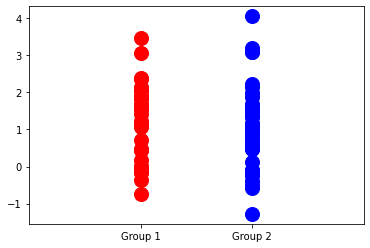

In [18]:
#Parameters 
items_in_dataset_one = 30   
items_in_dataset_two = 40

mean_dataset_one = 1
mean_dataset_two = 1.015

#generate data
data1 = mean_dataset_one + np.random.randn(items_in_dataset_one)
data2 = mean_dataset_two + np.random.randn(items_in_dataset_two)

#we then plot them.
plt.plot(np.zeros(items_in_dataset_one), data1,'ro', markersize=14)
plt.plot(np.ones(items_in_dataset_two), data2,'bo', markersize=14)
plt.xlim([-1,2])
plt.xticks([0,1],labels=['Group 1', 'Group 2'])
plt.show()

In [19]:
# Is there sig difference in the mean?
t_score, p_value = stats.ttest_ind(data1,data2)
print(f't_score: %g, P value %g'%(t_score,p_value),'Yes'if p_value <0.05 else 'No')

t_score: 0.577383, P value 0.565588 No


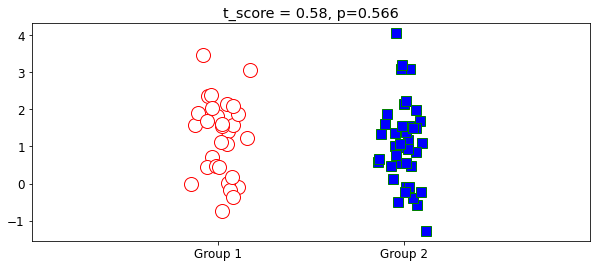

In [20]:
#We notice that the above is not intuitive.
#ets plot them.

fig = plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size':12})

plt.plot(0+np.random.randn(items_in_dataset_one)/15, data1, 'ro',markerfacecolor='w', markersize=14)
plt.plot(1+np.random.randn(items_in_dataset_two)/15, data2, 'gs',markerfacecolor='b', markersize=10)
plt.xlim([-1,2])
plt.xticks([0,1],labels=['Group 1', 'Group 2'])

# adding title to include t value and the p value
plt.title(f't_score = {t_score:.2f}, p={p_value:.3f}')
plt.show()




In [21]:
#Using Symbolic Math 
#Just for maths symbols..
import sympy as sym
import sympy.plotting.plot as symplot



4*x


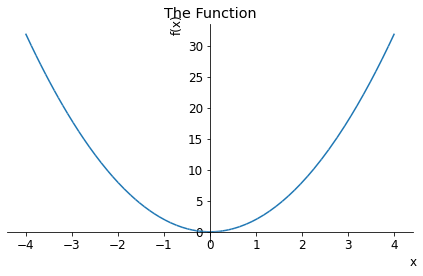

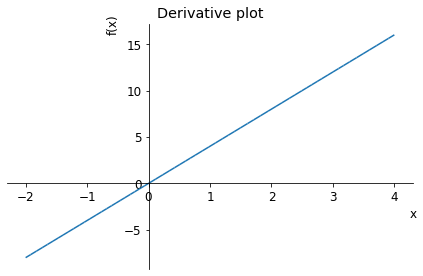

In [29]:
#creating the first symbol
x = sym.Symbol('x')

#creating a fxn
fx = 2*x**2

#computing fxn's derivative.
df = sym.diff(fx,x)

#displaying output.& potting
print(df)

#plot
symplot(fx,(x,-4,4),title='The Function')
plt.show()

#Derivative Plot
symplot(df,(x,-2,4),title='Derivative plot')
# plt.xlim([-2,2])
plt.show()

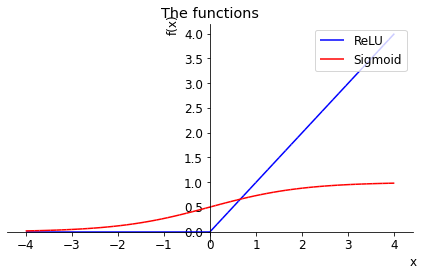

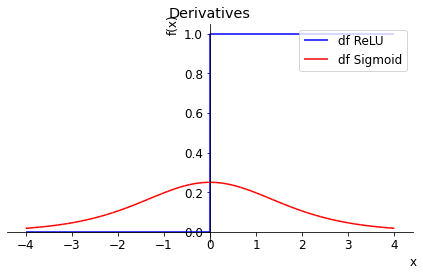

In [35]:
#Repeating the same with relu and sigmoid.
#create symboic functions
relu = sym.Max(0,x)
sigmoid = 1 / (1+sym.exp(-x))

#graph the functions
p = symplot(relu, (x, -4, 4), label='ReLU',show=False,line_color='blue')
p.extend(symplot(sigmoid,(x,-4,4),label='Sigmoid',show=False,line_color='red'))
p.legend = True
p.title = 'The functions'
p.show()

#on the same graph we show their derivatives.
p = symplot(sym.diff(relu), (x,-4,4), label ='df ReLU', show=False, line_color='blue')
p.extend(symplot(sym.diff(sigmoid),(x,-4,4),label='df Sigmoid',show=0,line_color='red'))
p.title = 'Derivatives'
p.legend = True
p.show()

In [36]:
from IPython import display

In [44]:
#creating symbolic variables in sympy
x = sym.Symbol('x')

#creating two functions 
fx = 2*x**3
gx = ((4*x**4)/(16*x**3)) - ((3*x**5)/((7*x)-(8*x**2)))

#computing the derivative
df = sym.diff(fx)
dg = sym.diff(gx)

#applying the product rule manually
manual = df*gx + fx*dg
the_wrongway = df*dg

#via sympy
viasympy = sym.diff(fx*gx)

#printing everyting
print('The functions:')
display.display(fx)
display.display(gx)
print(' ')

print('Manual product rule')
display.display(manual)
print(' ')

print('The wrong way: ')
display.display(the_wrongway)
print(' ')

print('The Derivatives')
display.display(viasympy)

The functions:


2*x**3

-3*x**5/(-8*x**2 + 7*x) + x/4

 
Manual product rule


2*x**3*(-3*x**5*(16*x - 7)/(-8*x**2 + 7*x)**2 - 15*x**4/(-8*x**2 + 7*x) + 1/4) + 6*x**2*(-3*x**5/(-8*x**2 + 7*x) + x/4)

 
The wrong way: 


6*x**2*(-3*x**5*(16*x - 7)/(-8*x**2 + 7*x)**2 - 15*x**4/(-8*x**2 + 7*x) + 1/4)

 
The Derivatives


2*x**3*(-3*x**5*(16*x - 7)/(-8*x**2 + 7*x)**2 - 15*x**4/(-8*x**2 + 7*x) + 1/4) + 6*x**2*(-3*x**5/(-8*x**2 + 7*x) + x/4)

Credits Section<br>
The display function form sympy displays very nice 
Mathematical expressions.<br>

Author: Lawrence M.<br>
Tutor: MxCohen<br>
code rewritten and modifed by Me.2022/27/10<br>
